In [1]:
# 1. Data description
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/guosiiyi/Desktop/统计咨询（DATA 201）/Final Project/tucson_restaurants_yelp.csv')

# Basic overview
print(df.head())
print(df.info())
print(df.describe())

                review_id                 user_id             business_id  \
0  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
1  ymhbOMW63B_vGaRFR3XT0A  yZdAhQ_KmKuCZmbBy9YDQg  5Ce3lZksYVkCbrihqylVHQ   
2  onlgwy5qGDEzddsrnIvtWg  pYXeL0RCqus2IfhthYCOyA  W7NxQw8UYFR0HLPrI08tvw   
3  M7h8K7PrLrN8yQb3RhHLdA  CysTz612pTix75Fye6-D4Q  WLiqfxv_GhFFA5sm878a2w   
4  f7fAYGJpd4gZAoJxuJcciw  LpZfJekvMo5S61UBAmuyHw  cXAKeC-EgVChIxhS7fscmw   

   stars_review  useful  funny  cool  \
0           3.0       0      0     0   
1           5.0       0      0     0   
2           4.0       0      0     0   
3           5.0       0      1     1   
4           5.0       2      0     0   

                                                text                 date  \
0  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30   
1  I just started going to Sushi Nara this month ...  2014-07-25 17:56:26   
2  Don't know what it is but If my tummy's feelin...  2012-02-01 

In [5]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df = df.dropna(subset=['text', 'stars_review'])  # Essential columns

review_id            0
user_id              0
business_id          0
stars_review         0
useful               0
funny                0
cool                 0
text                 0
date                 0
name                 0
city                 0
state                0
stars_business       0
review_count         0
categories           0
review_count_user    0
average_stars        0
fans                 0
dtype: int64


In [6]:
# Check the distribution of categorical variables
categorical_columns = ['review_id', 'user_id', 'business_id', 'text', 'date', 'name', 'city', 'state', 'categories']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].nunique())
    print(df[col].value_counts().head(10))  # Display the top 10 most common values

# View the distribution of the numerical column
numerical_columns = ['stars_review', 'useful', 'funny', 'cool', 'stars_business', 'review_count', 'review_count_user', 'average_stars', 'fans']
for col in numerical_columns:
    print(f"\nDistribution of {col}:")
    print(df[col].value_counts().head(10))  # Display the top 10 most common values

# Check the distribution of the date column
print("\nDate Distribution:")
print(df['date'].value_counts().head(10))  # Display the top 10 most common dates



Unique values in review_id:
2000
review_id
saUsX_uimxRlCVr67Z4Jig    1
9czi5iozct9JrNsBhlL6Mw    1
TYRMMAFWgUvtx6cF8FxkuQ    1
LvJDthLRQQa9m_km22kiIQ    1
1532NiY0u7N--D7Kcmjd9w    1
IhwXBQDC4DvKu_ep6acTCQ    1
WLZaRH1Fn7ia1_vpbMlBQg    1
t0JxBne_29610g1jmsO5mQ    1
HkiNkeLvPH8nXAZQbX-Lww    1
6Bzm1-Ytj_7CqCoJhpmrHA    1
Name: count, dtype: int64

Unique values in user_id:
1846
user_id
xyFtRXaTjhStZB3Zb9uFvA    4
-rGU3wo4fgEnGRboYdMTjw    4
A66EvH_nWJJb7d-F9FlJUw    4
P2FNLDMpSpdo92ydQlw7-g    3
IDKqeErl2l-huYugUzea6A    3
pJJwxIhRLyG09CsuMMemPg    3
wjF3QcTR0RKooLxYqB_m6g    3
Zv7xToaim0fDMNX1sZD8iQ    3
tqDxGR6FRIGcnIhpA8e4_Q    3
HKIFN7bin1aKtQZ9k9tRlQ    3
Name: count, dtype: int64

Unique values in business_id:
86
business_id
UCMSWPqzXjd7QHq7v8PJjQ    352
jmwasbZfgj3honf79qKsnA    122
f82dhKNiUXsDVPMLqKYiIQ     79
bXjnfT69E8DJinX-ifOofA     73
B10mqANgHvL8gBteo1UhAA     67
cXAKeC-EgVChIxhS7fscmw     65
GlYN-RJyL_YwxIqsSDo1ag     59
U3aNQ5DsABPYyJQolsCbJg     58
rViAhfKLKmwbhTKROM

In [7]:
# 2. Natural Language Processing
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Extract the text column
text_column = 'text' 
sample_text = ' '.join(df[text_column].dropna().tolist())  # Merge all the texts

print(df.head())

                review_id                 user_id             business_id  \
0  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
1  ymhbOMW63B_vGaRFR3XT0A  yZdAhQ_KmKuCZmbBy9YDQg  5Ce3lZksYVkCbrihqylVHQ   
2  onlgwy5qGDEzddsrnIvtWg  pYXeL0RCqus2IfhthYCOyA  W7NxQw8UYFR0HLPrI08tvw   
3  M7h8K7PrLrN8yQb3RhHLdA  CysTz612pTix75Fye6-D4Q  WLiqfxv_GhFFA5sm878a2w   
4  f7fAYGJpd4gZAoJxuJcciw  LpZfJekvMo5S61UBAmuyHw  cXAKeC-EgVChIxhS7fscmw   

   stars_review  useful  funny  cool  \
0           3.0       0      0     0   
1           5.0       0      0     0   
2           4.0       0      0     0   
3           5.0       0      1     1   
4           5.0       2      0     0   

                                                text                 date  \
0  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30   
1  I just started going to Sushi Nara this month ...  2014-07-25 17:56:26   
2  Don't know what it is but If my tummy's feelin...  2012-02-01 

In [10]:
import string

# Define the text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([char for char in text if not char.isdigit()])
    return text

# Preprocess the text
preprocessed_text = preprocess_text(sample_text)

words = word_tokenize(preprocessed_text)
print(f"Original word count: {len(words)}")


Original word count: 189250


In [12]:
# Define the stop word filtering function
def remove_stopwords(word_list, custom_stopwords=None):
    stop_words = set(stopwords.words('english'))
    if custom_stopwords:
        stop_words.update(custom_stopwords)
    filtered_words = [word for word in word_list if word not in stop_words]
    return filtered_words

# Add custom stop words
custom_stopwords = ['']
filtered_words = remove_stopwords(words, custom_stopwords)

print(f"Filtered word count: {len(filtered_words)}")
print(f"Removed {len(words) - len(filtered_words)} stopwords")

Filtered word count: 97783
Removed 91467 stopwords


In [13]:
# Define the stem extraction and inflection reduction functions
def stem_and_lemmatize(word_list):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stemmed_words = [stemmer.stem(word) for word in word_list]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in word_list]
    return stemmed_words, lemmatized_words

# Apply stem extraction and word form reduction
stemmed_words, lemmatized_words = stem_and_lemmatize(filtered_words)

# Print the comparison of the first 10 words
print(f"\nComparison of first 10 words:")
print(f"{'Original':<15} {'Stemmed':<15} {'Lemmatized':<15}")
print("-" * 45)
for i in range(10):
    if i < len(filtered_words):
        print(f"{filtered_words[i]:<15} {stemmed_words[i]:<15} {lemmatized_words[i]:<15}")


Comparison of first 10 words:
Original        Stemmed         Lemmatized     
---------------------------------------------
family          famili          family         
diner           diner           diner          
buffet          buffet          buffet         
eclectic        eclect          eclectic       
assortment      assort          assortment     
large           larg            large          
chicken         chicken         chicken        
leg             leg             leg            
fried           fri             fried          
jalapeño        jalapeño        jalapeño       



--- Word Frequency Analysis ---
Top 15 most frequent words:
 food: 1525
 good: 1106
 place: 998
 great: 831
 service: 779
 like: 610
 one: 600
 get: 581
 back: 524
 time: 522
 go: 518
 would: 482
 tucson: 454
 really: 451
 restaurant: 426


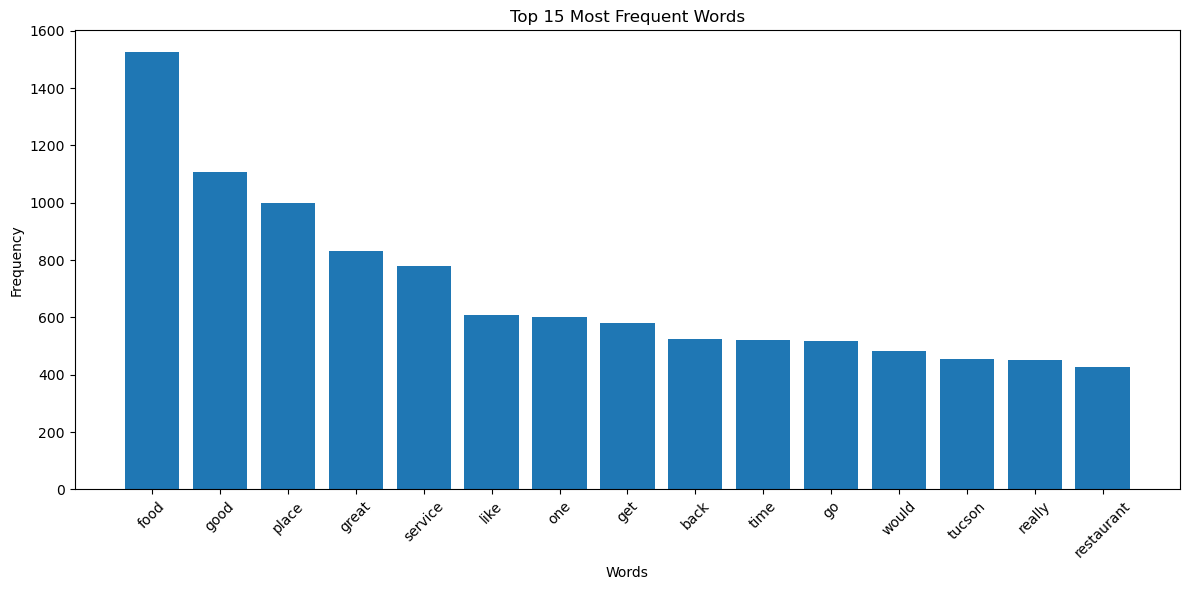

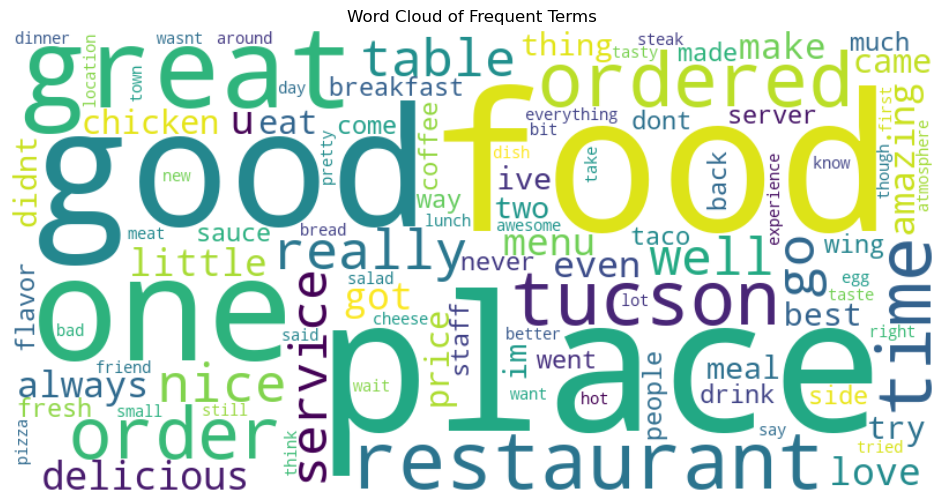

In [14]:
# Define the word frequency analysis function
def analyze_frequency(word_list, n=10):
    fdist = FreqDist(word_list)
    most_common = fdist.most_common(n)
    words_mc = [word for word, count in most_common]
    counts_mc = [count for word, count in most_common]
    return fdist, words_mc, counts_mc

# Analyze the word frequency
top_n = 15  # Print the top 15 most frequently used words
fdist, top_words, top_counts = analyze_frequency(filtered_words, top_n)

# Print the most frequently used words
print(f"\n--- Word Frequency Analysis ---")
print(f"Top {top_n} most frequent words:")
for word, count in zip(top_words, top_counts):
    print(f" {word}: {count}")

# Draw a bar chart of word frequency
plt.figure(figsize=(12, 6))
plt.bar(top_words, top_counts)
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(' '.join(filtered_words))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Terms')
plt.show()

In [15]:
# Define the sentiment analysis function
def analyze_sentiment(text, by_sentence=False):
    sia = SentimentIntensityAnalyzer()
    if by_sentence:
        sentences = sent_tokenize(text)
        results = []
        for sentence in sentences:
            sentiment = sia.polarity_scores(sentence)
            results.append((sentence, sentiment))
        return results
    else:
        sentiment = sia.polarity_scores(text)
        return sentiment

# Conduct sentiment analysis
analyze_by_sentence = False  # Whether to analyze by sentence
sentiment_results = analyze_sentiment(preprocessed_text, analyze_by_sentence)

print(f"\n--- Sentiment Analysis ---")
if analyze_by_sentence:
    print("Sentiment analysis by sentence:")
    for i, (sentence, sentiment) in enumerate(sentiment_results[:5]):  # Display the first five sentences
        print(f"\nSentence {i+1}: {sentence}")
        print(f" Negative: {sentiment['neg']:.3f}")
        print(f" Neutral: {sentiment['neu']:.3f}")
        print(f" Positive: {sentiment['pos']:.3f}")
        print(f" Compound: {sentiment['compound']:.3f}")
    avg_compound = sum(s['compound'] for _, s in sentiment_results) / len(sentiment_results)
    print(f"\nAverage compound score: {avg_compound:.3f}")
else:
    print("Overall sentiment analysis:")
    print(f" Negative: {sentiment_results['neg']:.3f}")
    print(f" Neutral: {sentiment_results['neu']:.3f}")
    print(f" Positive: {sentiment_results['pos']:.3f}")
    print(f" Compound: {sentiment_results['compound']:.3f}")


--- Sentiment Analysis ---
Overall sentiment analysis:
 Negative: 0.054
 Neutral: 0.718
 Positive: 0.228
 Compound: 1.000


In [17]:
# 3. Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, silhouette_score

# Select the features and target variables
features = ['stars_business', 'useful', 'funny', 'cool', 'review_count_user', 'average_stars', 'fans']
target = 'stars_review'

# Fill in the missing values
df[features] = df[features].fillna(df[features].mean())

# Split the dataset
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {model.score(X_test, y_test):.4f}")

# Print the model coefficients
print("Model Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")

Mean Squared Error: 1.1126
R^2 Score: 0.4229
Model Coefficients:
stars_business: 0.5836
useful: -0.1603
funny: -0.1500
cool: 0.3606
review_count_user: -0.0004
average_stars: 0.6778
fans: 0.0002


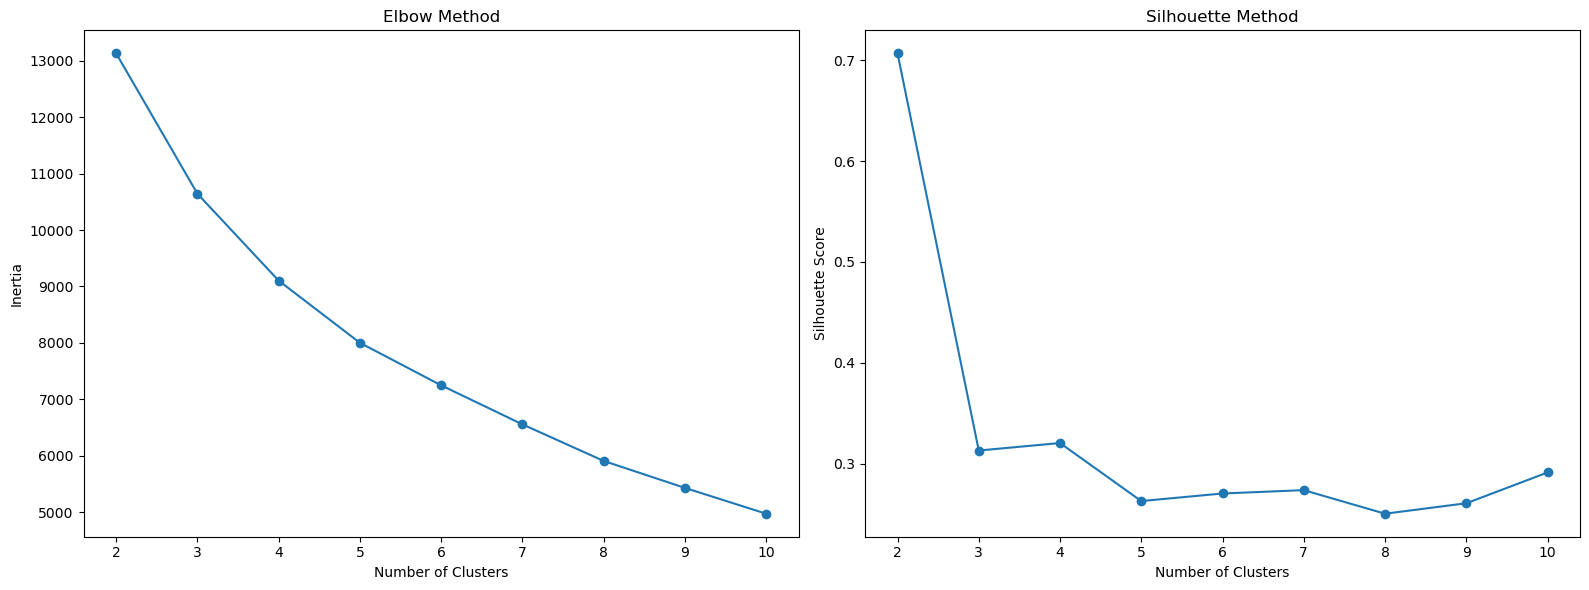

Recommended number of clusters based on silhouette score: 2


In [19]:
# 4. Clustering
# Select clustering features
clustering_features = ['stars_business', 'review_count', 'average_stars', 'review_count_user', 'fans', 'useful', 'funny', 'cool']
data_cluster = df[clustering_features]

# Standardize the data
scaler = StandardScaler()
data_cluster_scaled = scaler.fit_transform(data_cluster)

# Determine the optimal number of clusters
def find_optimal_clusters(X, max_clusters=10):
    inertias = []
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))
    
    # Draw the elbow method diagram and the silhouette method diagram
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    ax1.plot(range(2, max_clusters + 1), inertias, 'o-')
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method')
    
    ax2.plot(range(2, max_clusters + 1), silhouette_scores, 'o-')
    ax2.set_xlabel('Number of Clusters')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Method')
    
    plt.tight_layout()
    plt.show()
    
    best_k_silhouette = np.argmax(silhouette_scores) + 2
    print(f"Recommended number of clusters based on silhouette score: {best_k_silhouette}")
    return best_k_silhouette

optimal_clusters = find_optimal_clusters(data_cluster_scaled)

In [22]:
# Perform K-Means clustering using the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(data_cluster_scaled)

# View the feature mean of each cluster
cluster_means = df.groupby('cluster')[clustering_features].mean()
print("Mean feature values for each cluster:")
print(cluster_means)

Mean feature values for each cluster:
         stars_business  review_count  average_stars  review_count_user  \
cluster                                                                   
0              3.794918    601.897844       3.761396          69.500513   
1              3.807692    470.442308       3.811346         543.769231   

              fans    useful     funny      cool  
cluster                                           
0         3.463552  0.701232  0.184805  0.231006  
1        83.346154  7.307692  3.096154  4.288462  


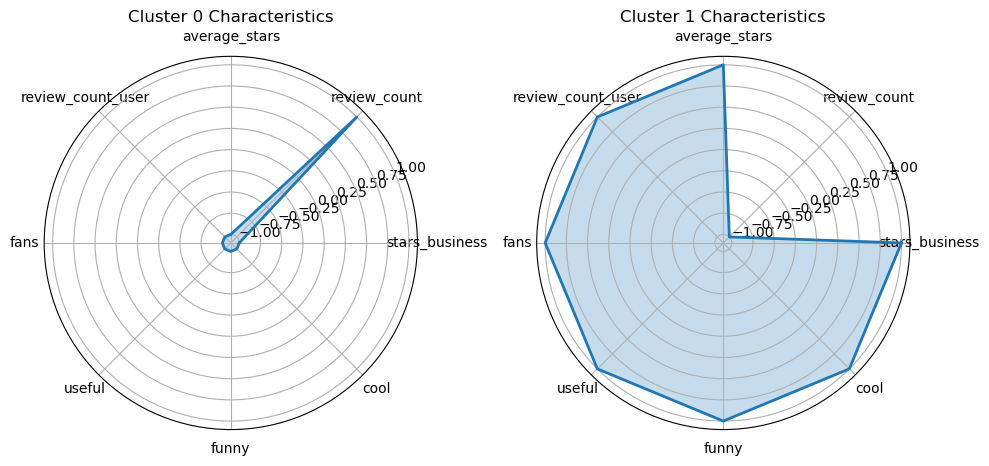

In [23]:
# Draw the radar chart
def plot_radar_chart(cluster_means):
    num_clusters = len(cluster_means)
    num_features = len(cluster_means.columns)
    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]

    fig, axes = plt.subplots(1, num_clusters, figsize=(num_clusters * 5, 5), subplot_kw=dict(polar=True))
    if num_clusters == 1:
        axes = [axes]

    feature_scaler = StandardScaler()
    cluster_means_scaled = pd.DataFrame(feature_scaler.fit_transform(cluster_means), index=cluster_means.index, columns=cluster_means.columns)

    for i, ax in enumerate(axes):
        values = cluster_means_scaled.iloc[i].values.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid')
        ax.fill(angles, values, alpha=0.25)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(cluster_means.columns)
        ax.set_title(f'Cluster {i} Characteristics')
    
    plt.tight_layout()
    plt.show()

plot_radar_chart(cluster_means)


In [25]:
# 5. Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract text features
vectorizer = TfidfVectorizer(max_features=100)  # Limit the number of features to 100
text_features = vectorizer.fit_transform(df['text']).toarray()

# Add the text features to the dataset
text_feature_names = vectorizer.get_feature_names_out()
text_features_df = pd.DataFrame(text_features, columns=text_feature_names)
df = pd.concat([df, text_features_df], axis=1)

# Select other text features
numeric_features = ['stars_review', 'useful', 'funny', 'cool', 'stars_business', 'review_count', 'review_count_user', 'average_stars', 'fans']
features = list(numeric_features) + list(text_feature_names)

# Fill in the missing values
df[features] = df[features].fillna(0)

In [26]:
# Select the target variables
df['sentiment'] = df['stars_review'].apply(lambda x: 1 if x >= 4 else 0)
target = 'sentiment'

# Split the dataset
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the k-NN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prediction
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 71  55]
 [ 36 238]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.56      0.61       126
           1       0.81      0.87      0.84       274

    accuracy                           0.77       400
   macro avg       0.74      0.72      0.72       400
weighted avg       0.77      0.77      0.77       400



/var/folders/7s/xf874f6n08n5sn9z4dk0h_l40000gn/T/ipykernel_37008/3233856906.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['sentiment'] = df['stars_review'].apply(lambda x: 1 if x >= 4 else 0)


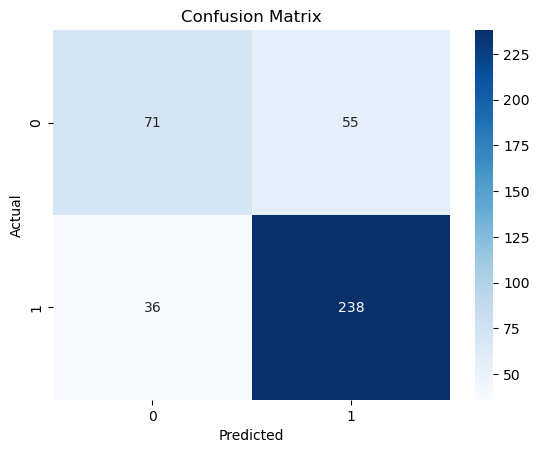

In [27]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()